In [90]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [91]:
df = pd.read_csv('..\\Datasets\\placement.csv')
df.sample()

,cgpa,package
72,7.78,3.62


In [92]:
X = df.iloc[:,0:1]
y = df.iloc[:,1]
print(X)
print(y)

     cgpa
0    6.89
1    5.12
2    7.82
3    7.42
4    6.94
..    ...
195  6.93
196  5.89
197  7.21
198  7.63
199  6.22

[200 rows x 1 columns]
0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64


Text(0, 0.5, 'package')

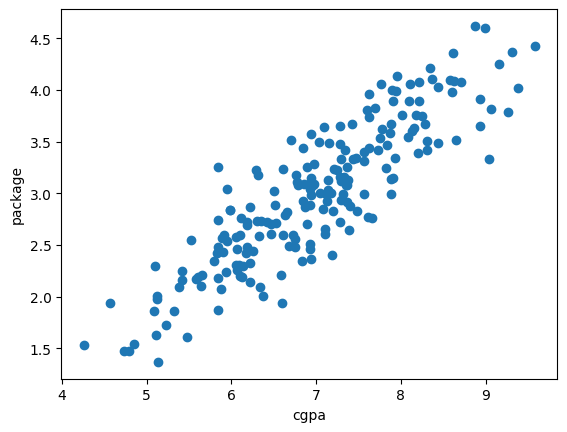

In [93]:
plt.scatter(X,y)
plt.xlabel('cgpa')
plt.ylabel('package')

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [95]:
lr = LinearRegression()
lr.fit(X_train,y_train)
# lr.predict(X.iloc[0].values.reshape(1,1))
# lr.predict([[8.58]])
y_pred = lr.predict(X_test)
print(y_pred)
# print(y_test.values)
print(pd.Series.to_numpy(y_test))

[3.89111601 3.09324469 2.38464568 2.57434935 1.6537286  1.77647803
 2.07219258 2.93143862 3.76278706 2.93701814 4.09197872 3.51170867
 2.97049525 2.40138424 3.18809652 3.46707251 1.94386362 3.24389172
 2.97607477 3.41685683 2.55761079 3.16577844 2.85890486 3.12114229
 3.68467378 2.8700639  3.49497011 3.34432308 3.91901361 1.96060218
 3.65119666 3.2104146  3.74046898 2.7863711  2.78079158 3.27178932
 3.52844723 2.61340599 2.65804215 2.71383735]
[4.1  3.49 2.08 2.33 1.94 1.48 1.86 3.09 4.21 2.87 3.65 4.   2.89 2.6
 2.99 3.25 1.86 3.67 2.37 3.42 2.48 3.65 2.6  2.83 4.08 2.56 3.58 3.81
 4.09 2.01 3.63 2.92 3.51 1.94 2.21 3.34 3.34 3.23 2.01 2.61]


In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [97]:
lr.predict(X_test)

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

# Mean Absoulte Error

In [98]:
print('MAE : ', mean_absolute_error(y_test,y_pred))

MAE :  0.2884710931878175


# Mean Squared Error

In [99]:
print('MSE : ', mean_squared_error(y_test,y_pred))

MSE :  0.12129235313495527


# Root Mean Squared Error

In [100]:
print('RMSE : ', np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE :  0.34827051717731616


# R2 Score

In [101]:
print('R2 Score : ', r2_score(y_test,y_pred))

R2 Score :  0.780730147510384


# Adjusted R2 Score

In [132]:
print(X_test.shape)
n=(X_test.shape[0])
r2 = r2_score(y_test,y_pred)
adj_r2 = 1-((1-r2)*(n-1)/(n-1-1))
print('Adjusted r2:', adj_r2)

(40, 2)
Adjusted r2: 0.7812578043095751


# Adding a irrevalent feature to study R2 scores

In [103]:
new_df = df.copy()
new_df['random_feature'] = np.random.random(200)
new_df = new_df[['cgpa','random_feature','package']]
new_df.sample()

,cgpa,random_feature,package
29,7.15,0.942241,3.49


Text(0, 0.5, 'package')

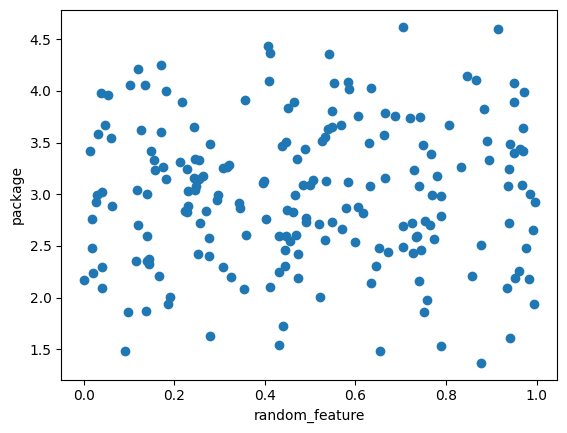

In [104]:
plt.scatter(new_df['random_feature'], new_df['package'])
plt.xlabel('random_feature')
plt.ylabel('package')

In [105]:
X = new_df[['cgpa','random_feature']]
y = new_df['package']
X.sample(), y.sample()

(     cgpa  random_feature
 115  8.35         0.11944,
 118    2.88
 Name: package, dtype: float64)

In [106]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [107]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(y_pred)
print(y_test.values)

[3.88611813 3.11665967 2.37607617 2.55454661 1.67942476 1.75354877
 2.04978109 2.95611058 3.74215819 2.92826117 4.07823259 3.49431501
 2.94646487 2.39702749 3.20228664 3.45642913 1.95658448 3.24722915
 2.95653285 3.39764016 2.58270767 3.16804131 2.85559215 3.11875337
 3.68731579 2.87131036 3.46956609 3.34662821 3.92348464 1.9609597
 3.65313094 3.20164233 3.73746494 2.76898172 2.76230631 3.26992996
 3.51452417 2.59435145 2.64079309 2.7056555 ]
[4.1  3.49 2.08 2.33 1.94 1.48 1.86 3.09 4.21 2.87 3.65 4.   2.89 2.6
 2.99 3.25 1.86 3.67 2.37 3.42 2.48 3.65 2.6  2.83 4.08 2.56 3.58 3.81
 4.09 2.01 3.63 2.92 3.51 1.94 2.21 3.34 3.34 3.23 2.01 2.61]


In [112]:
r2 = r2_score(y_test,y_pred)
print('R2 score: ',r2)

print(X_test.shape)
adj_r2 = 1-((1-r2)*(40-1)/(40-1-2))
print(adj_r2)

R2 score:  0.7868665785580475
(40, 2)
0.7753458530746987


Addition of random feature increased R2 score <br>
Addition of random feature decreased adjusted R2 score

# Addition of Relevant feature

In [115]:
new_df1 = df.copy()
new_df1['iq'] = new_df1['package'] +np.random.randint(-12,12,200)/10
new_df1=new_df1[['cgpa','iq','package']]
new_df1.sample()

,cgpa,iq,package
122,5.12,0.81,2.01


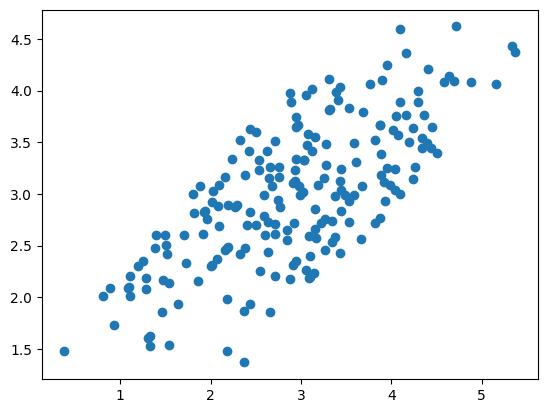

In [116]:
plt.scatter(new_df1['iq'], new_df1['package'])
plt.xlabel('iq')
plt.ylabel('package')

In [118]:
X = new_df1[['cgpa','iq']]
y = new_df1['package']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [128]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(y_pred)
print(y_test.values)

[3.88611813 3.11665967 2.37607617 2.55454661 1.67942476 1.75354877
 2.04978109 2.95611058 3.74215819 2.92826117 4.07823259 3.49431501
 2.94646487 2.39702749 3.20228664 3.45642913 1.95658448 3.24722915
 2.95653285 3.39764016 2.58270767 3.16804131 2.85559215 3.11875337
 3.68731579 2.87131036 3.46956609 3.34662821 3.92348464 1.9609597
 3.65313094 3.20164233 3.73746494 2.76898172 2.76230631 3.26992996
 3.51452417 2.59435145 2.64079309 2.7056555 ]
[4.1  3.49 2.08 2.33 1.94 1.48 1.86 3.09 4.21 2.87 3.65 4.   2.89 2.6
 2.99 3.25 1.86 3.67 2.37 3.42 2.48 3.65 2.6  2.83 4.08 2.56 3.58 3.81
 4.09 2.01 3.63 2.92 3.51 1.94 2.21 3.34 3.34 3.23 2.01 2.61]


In [135]:
r2 = r2_score(y_test,y_pred)
print('R2 score:', r2)

adj_r2 = 1 - ((1-r2)*(40-1)/(40-1-2))
print('Adjusted r2: ', adj_r2)
# R2 Score :  0.780730147510384 in original data
# Adjusted r2: 0.7812578043095751 in original data

R2 score: 0.7868665785580475
Adjusted r2:  0.7753458530746987
